In [8]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import  shapiro,mannwhitneyu,ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [2]:
df=pd.read_csv("C:\\Users\\Nidhi\\Downloads\\Wine_data.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [61]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


(4898, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [15]:
from scipy.stats import stats
for i in df.columns[:-1]:
    print(shapiro(df[i])[1],[i])

1.1670058868147737e-27 ['fixed acidity']
0.0 ['volatile acidity']
9.80908925027372e-45 ['citric acid']
0.0 ['residual sugar']
0.0 ['chlorides']
3.83382648153091e-40 ['free sulfur dioxide']
4.355319441087306e-19 ['total sulfur dioxide']
1.7806248018391963e-36 ['density']
6.633951677288629e-20 ['pH']
1.8156972845314579e-37 ['sulphates']
2.5578040326544056e-36 ['alcohol']


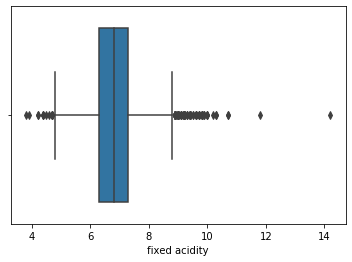

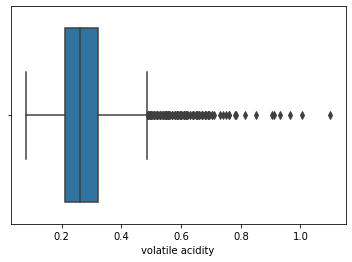

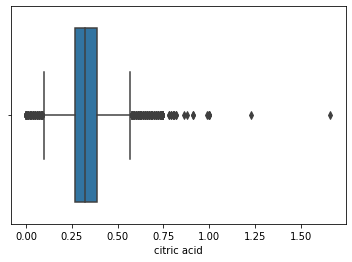

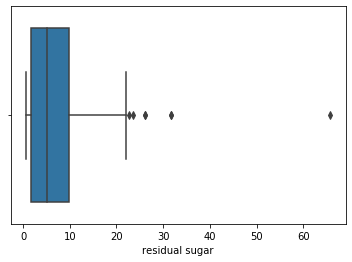

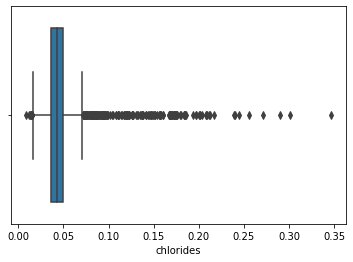

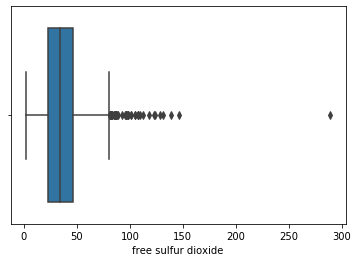

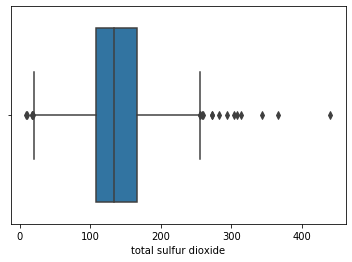

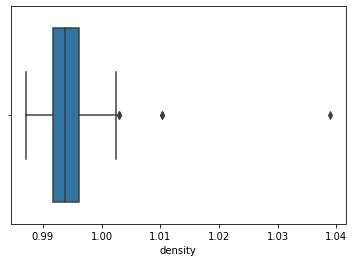

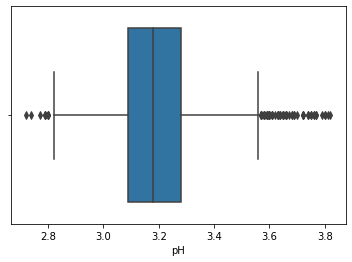

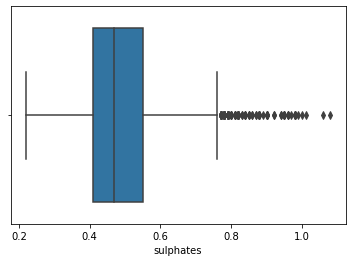

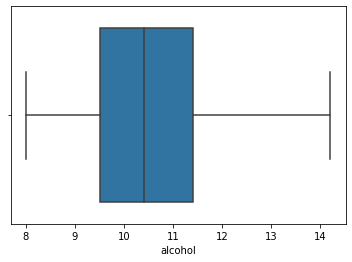

In [16]:
for i in df.columns[:-1]:
    sns.boxplot(df[i])
    plt.show()

In [22]:
a=df.groupby('quality')
df['quality'].value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

In [24]:
df1=a.get_group(6)
df2=a.get_group(5)
df3=a.get_group(7)
df4=a.get_group(8)
df5=a.get_group(4)
df6=a.get_group(3)
df7=a.get_group(9)

In [25]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [33]:
from scipy.stats import stats ,f_oneway
for i in df.columns[:-1]:
    ftest=f_oneway(df1[i],df2[i],df3[i],df4[i],df5[i],df6[i],df7[i])
    print(ftest[1],i)

1.6385499179290163e-14 fixed acidity
2.6609789450914528e-74 volatile acidity
0.003476297718864736 citric acid
8.774191501873014e-25 residual sugar
8.504479837410577e-51 chlorides
7.013573248776799e-23 free sulfur dioxide
4.04401251896838e-54 total sulfur dioxide
8.499687144335628e-126 density
3.963648462380966e-11 pH
0.0013084373639033289 sulphates
2.9254274292066075e-259 alcohol


In [39]:
df.skew()

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

In [46]:
y=df['quality']
x=df.drop('quality',axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer()
x_train_pt=pt.fit_transform(x_train)
x_test_pt=pt.transform(x_test)

In [47]:
x_train=pd.DataFrame(pt.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(pt.transform(x_test),columns=x_test.columns)


# LR,NB

In [55]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

print('train_acc :',accuracy_score(y_train,y_train_pred))
print('train_cm :',confusion_matrix(y_train,y_train_pred))



print('test_acc : ',accuracy_score(y_test,y_test_pred))
print('test_cm : ',confusion_matrix(y_test,y_test_pred))


train_acc : 0.5457992998833139
train_cm : [[   0    0    3    8    0    0    0]
 [   0    0   68   35    0    0    0]
 [   0    0  531  464    4    0    0]
 [   0    0  278 1248   42    0    0]
 [   0    0   19  502   92    0    0]
 [   0    0    2  107   20    0    0]
 [   0    0    0    1    4    0    0]]
test_acc :  0.5340136054421769
test_cm :  [[  0   0   5   4   0   0]
 [  0   0  33  26   1   0]
 [  0   0 234 223   1   0]
 [  0   1 103 511  15   0]
 [  0   0  16 211  40   0]
 [  0   0   0  40   6   0]]


In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report

In [60]:
print(classification_report(y_train,lr.predict(x_train)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00       103
           5       0.59      0.53      0.56       999
           6       0.53      0.80      0.63      1568
           7       0.57      0.15      0.24       613
           8       0.00      0.00      0.00       129
           9       0.00      0.00      0.00         5

    accuracy                           0.55      3428
   macro avg       0.24      0.21      0.20      3428
weighted avg       0.51      0.55      0.50      3428



In [62]:
kf=KFold(shuffle=True,n_splits=5,random_state=0)
score=cross_val_score(lr,x_train,y_train,cv=kf,scoring='f1_weighted')
print('BE',np.mean(1-score))
print('VE',np.std(score,ddof=1))

BE 0.5080807049991206
VE 0.010671498999448498


In [63]:
nb=GaussianNB()
kf=KFold(shuffle=True,n_splits=5,random_state=0)
score=cross_val_score(nb,x_train,y_train,cv=kf,scoring='f1_weighted')
print('BE',np.mean(1-score))
print('VE',np.std(score,ddof=1))

BE 0.5198283090700005
VE 0.018378875316197463


# KNN

In [72]:
knn_be=[]
knn_ve=[]
for i in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=i,weights='distance')
    kf=KFold(shuffle=True,n_splits=5,random_state=0)
    score=cross_val_score(nb,x_train,y_train,cv=kf,scoring='f1_weighted')
    knn_be.append(np.mean(1-score))
    knn_ve.append(np.std(score,ddof=1))
    
    

In [71]:
np.min(knn_be),np.argmin(knn_be)

(0.5198283090700005, 0)

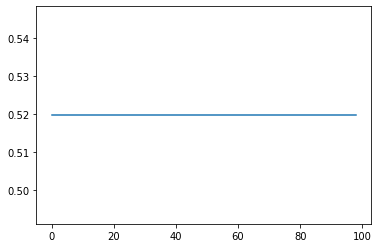

In [74]:
x_axis=np.arange(len(knn_be))
plt.plot(x_axis,knn_be)

In [80]:
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(1,100),'weights':['uniform','distance']}
gd=GridSearchCV(knn,param,cv=kf,scoring='f1_weighted')
gd.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 2...26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['unif

In [81]:
gd.best_params_

{'n_neighbors': 20, 'weights': 'distance'}

In [83]:
knn=KNeighborsClassifier(n_neighbors= 20, weights= 'distance')
kf=KFold(shuffle=True,n_splits=5,random_state=0)
score=cross_val_score(knn,x_train,y_train,cv=kf,scoring='f1_weighted')
print('BE',np.mean(1-score))
print('VE',np.std(score,ddof=1))
    

BE 0.3676410973263454
VE 0.0106819601142795


In [84]:
np.mean(score)

0.6323589026736546

# DT

In [85]:
DT=DecisionTreeClassifier(random_state=0)
kf=KFold(shuffle=True,n_splits=5,random_state=0)
score=cross_val_score(DT,x_train,y_train,cv=kf,scoring='f1_weighted')
print('BE',np.mean(1-score))
print('VE',np.std(score,ddof=1))

BE 0.43101805084358746
VE 0.00530322023846104


In [95]:
DT=DecisionTreeClassifier(random_state=0)
param={'max_depth':np.arange(1,100),'criterion':['gini','entropy']}
gd=GridSearchCV(DT,param,cv=kf,scoring='f1_weighted')
gd.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, ran...
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
   

In [97]:
gd.best_params_

{'criterion': 'entropy', 'max_depth': 22}

In [98]:
DT=DecisionTreeClassifier(criterion='entropy',max_depth=22,random_state=0)
kf=KFold(shuffle=True,n_splits=5,random_state=0)
score=cross_val_score(DT,x_train,y_train,cv=kf,scoring='f1_weighted')
print('BE',np.mean(1-score))
print('VE',np.std(score,ddof=1))
print('score ',np.mean(score))

BE 0.428257798408285
VE 0.018064000895968997
score  0.5717422015917151


# RF

In [100]:
RF=RandomForestClassifier(random_state=0)
params={' max_depth':np.arange(1,100),'criterion':['gini','entropy']}
gd=GridSearchCV(RF,param,cv=kf,scoring='f1_weighted')
gd.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,...
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,

In [101]:
gd.best_params_

{'criterion': 'gini', 'max_depth': 19}

In [102]:
RF=RandomForestClassifier(criterion='gini',max_depth=19,random_state=0)
kf=KFold(shuffle=True,n_splits=5,random_state=0)
score=cross_val_score(RF,x_train,y_train,cv=kf,scoring='f1_weighted')
print('BE',np.mean(1-score))
print('VE',np.std(score,ddof=1))
print('score ',np.mean(score))

BE 0.38161169968192
VE 0.01655344659109536
score  0.61838830031808


In [103]:
rf_be=[]
rf_ve=[]
for i in range(1,100):
    RF=RandomForestClassifier(criterion='gini',max_depth=i,random_state=0)
    kf=KFold(shuffle=True,n_splits=5,random_state=0)
    score=cross_val_score(RF,x_train,y_train,cv=kf,scoring='f1_weighted')
    rf_be.append(np.mean(1-score))
    rf_ve.append(np.std(score,ddof=1))
    
    

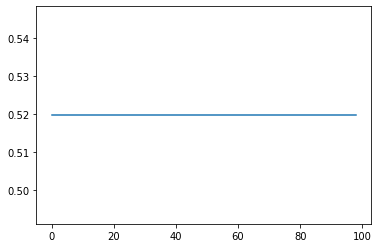

In [104]:
x_axis=np.arange(len(knn_be))
plt.plot(x_axis,knn_be)

In [109]:
np.min(rf_be),np.argmin(rf_be),rf_ve[18]

(0.38161169968192, 18, 0.01655344659109536)